## Multi-Asset Raw Data Audit Step 4

This notebook performs an initial sanity check and structural audit of raw and proccessed price and volume data across multiple liquid assets before feature engineering and strategy evaluation. Evaluates raw data and then canonical data that should be populated in phase_2/data/processed after running python ./phase_2/scripts/clean_validate/clean_validate_daily_v1.py 

### Assets Included
- **SPY** — Broad U.S. equity market proxy
- **MSFT** — Large-cap technology (single-name equity)
- **AAPL** — Large-cap consumer technology (single-name equity)

### Audit Objectives
- Verify data completeness and continuity
- Confirm adjusted close consistency across assets
- Inspect raw return distributions and volatility behavior
- Identify asset-specific structural differences (trend persistence, volatility regimes)
- Ensure uniform preprocessing assumptions prior to strategy application

### Scope
This audit is **descriptive only**.  
No signals, models, or allocations are applied at this stage.

All subsequent feature construction, strategy logic, and regime analysis assume the data validated here.

In [1]:
import pandas as pd

files = {
    "SPY": "../data/raw/spy_yahoo_raw.parquet",
    "AAPL": "../data/raw/aapl_yahoo_raw.parquet",
    "MSFT": "../data/raw/msft_yahoo_raw.parquet",
}

dfs = {sym: pd.read_parquet(path) for sym, path in files.items()}

{sym: df.shape for sym, df in dfs.items()}


{'SPY': (4025, 7), 'AAPL': (4025, 7), 'MSFT': (4025, 7)}

In [2]:
for sym, df in dfs.items():
    print("----", sym, "----")
    print("columns:", list(df.columns))
    print("date range:", df["date"].min(), "→", df["date"].max())
    print("dup dates:", df["date"].duplicated().sum())
    print("nulls:", df.isna().sum().to_dict())


---- SPY ----
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
dup dates: 0
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}
---- AAPL ----
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
dup dates: 0
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}
---- MSFT ----
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
dup dates: 0
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}


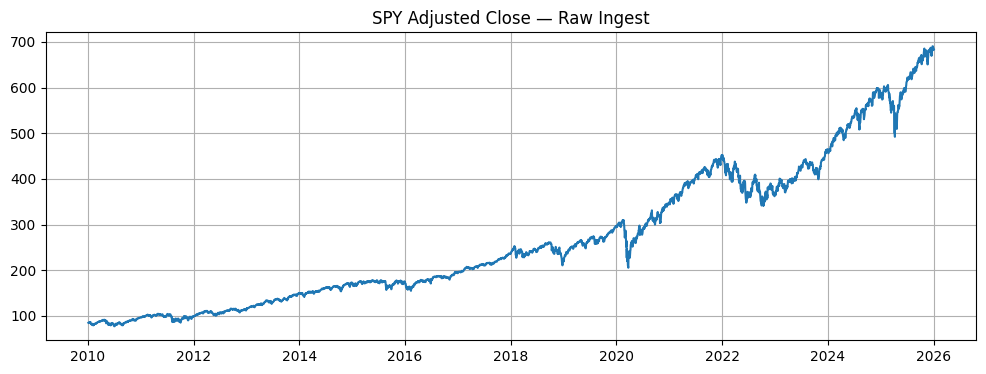

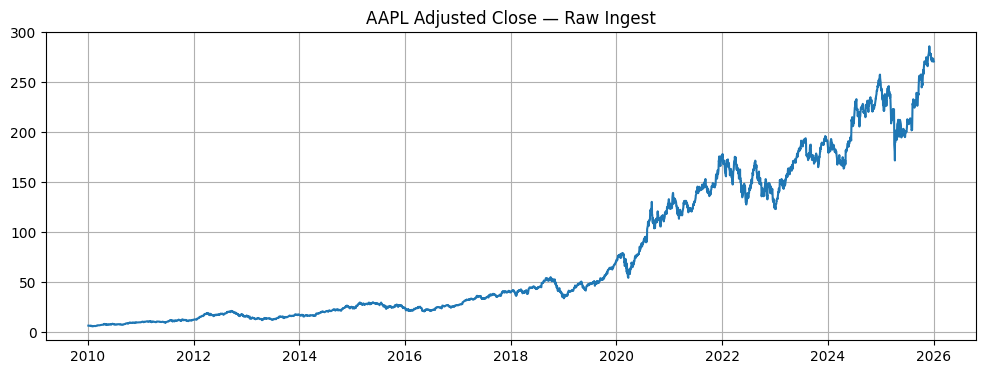

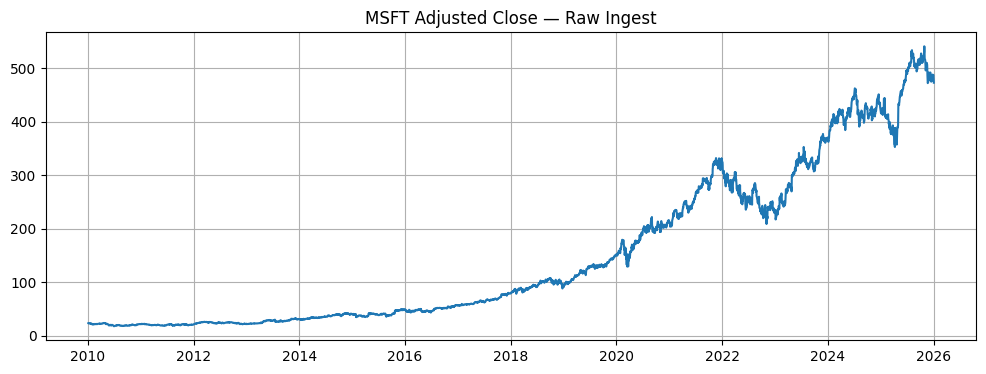

In [3]:
import matplotlib.pyplot as plt

for sym, df in dfs.items():
    plt.figure(figsize=(12,4))
    plt.plot(pd.to_datetime(df["date"]), df["adj_close"])
    plt.title(f"{sym} Adjusted Close — Raw Ingest")
    plt.grid(True)
    plt.show()


In [4]:
files = {
    "SPY": "../data/processed/spy_daily.parquet",
    "AAPL": "../data/processed/aapl_daily.parquet",
    "MSFT": "../data/processed/msft_daily.parquet",
}

dfs = {sym: pd.read_parquet(path) for sym, path in files.items()}

for sym, df in dfs.items():
    print("----", sym, "----")
    print("rows:", len(df))
    print("columns:", list(df.columns))
    print("date range:", df["date"].min(), "→", df["date"].max())
    print("nulls:", df.isna().sum().to_dict())


---- SPY ----
rows: 4025
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}
---- AAPL ----
rows: 4025
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}
---- MSFT ----
rows: 4025
columns: ['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
date range: 2010-01-04 00:00:00 → 2026-01-02 00:00:00
nulls: {'date': 0, 'open': 0, 'high': 0, 'low': 0, 'close': 0, 'adj_close': 0, 'volume': 0}


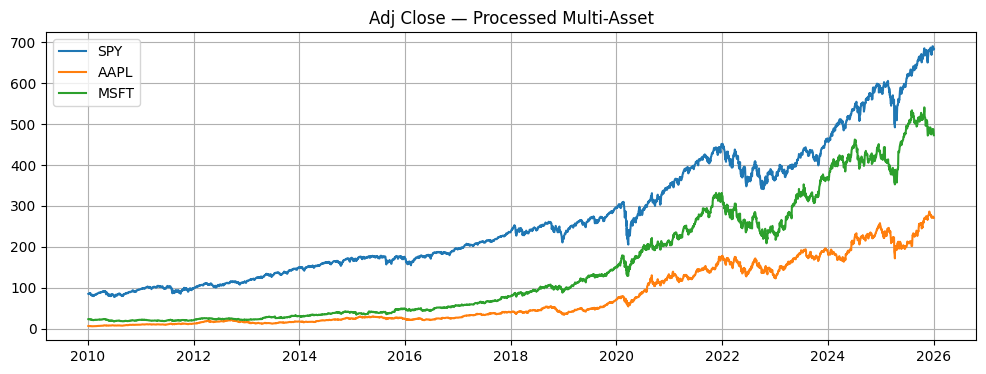

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for sym, df in dfs.items():
    plt.plot(df["date"], df["adj_close"], label=sym)

plt.title("Adj Close — Processed Multi-Asset")
plt.legend()
plt.grid(True)
plt.show()
